# source acoustique rtsys

Tests du 11/04/2019

In [23]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
M = pd.DataFrame({'frequency': np.arange(2,14),
                  'SL_0.7': [160.9, 167.1, 170.9, 176.8, 182.9, 188.1, 189.2, 
                                188.8, 187.3, 185.6, 183.4, 183.7,],
                  'SL_1': [166.3, 171.1, 174.1, 178.5, 184.5, 188.6, 190.6, 
                              190.7, 189.8, 188.8, 187.5, 186.9]},
                  ).set_index('frequency')

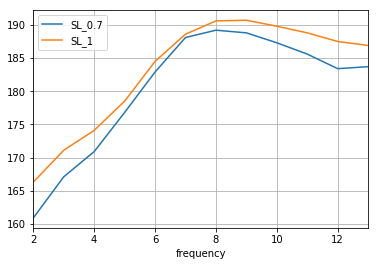

In [48]:
M.plot()
plt.grid()

## translate into reception levels as a function of range and frequency

$RL=SL-TL$

Transmission loss:
$TL=20\log(r)+\alpha(r)$

Uses Thorpe 1067 model for the absorption coefficient:
$\alpha=f^2 \times \Big [ \frac{0.11}{1+f^2} +\frac{44}{4100+f^2} \Big ]$
where f is in kHz and $\alpha$ is in dB/km

In [49]:
alpha = (lambda f: f**2 * (.11/(1+f**2) + 44/(4100+f**2)))

r = pd.DataFrame({'range':np.arange(0,100)*1e3}).set_index('range')
ds = xr.merge([xr.Dataset.from_dataframe(M), xr.Dataset.from_dataframe(r)])

ds['TL'] = 20*np.log10(ds.range) + alpha(ds.frequency)*ds.range/1e3
ds['RL_0.7'] = ds['SL_0.7'] - ds['TL']
ds['RL_1'] = ds['SL_1'] - ds['TL']

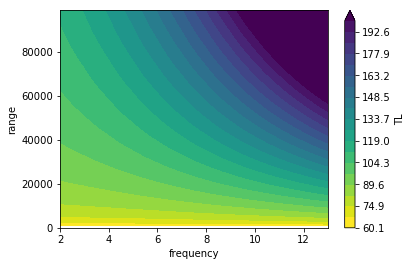

In [50]:
ds['TL'].plot.contourf(vmax=200,levels=20,cmap='viridis_r')

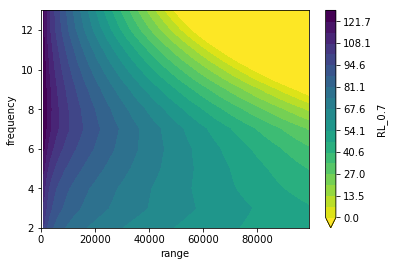

In [52]:
ds['RL_0.7'].plot.contourf(vmin=0,levels=20,cmap='viridis_r')

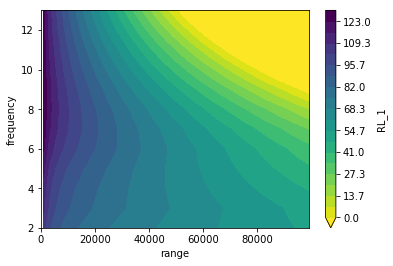

In [53]:
ds['RL_1'].plot.contourf(vmin=0,levels=20,cmap='viridis_r')